In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [2]:
data=DataFrame(np.array([[-0.86,-0.30,-0.05,0.73],[5,5,5,5],[0,1,3,5]]),index=["Dose","Number of animals","Number of deaths"]).T
print data

   Dose  Number of animals  Number of deaths
0 -0.86                  5                 0
1 -0.30                  5                 1
2 -0.05                  5                 3
3  0.73                  5                 5


In [116]:
def weighted_lr(n,y,X,ite,size):
    p=len(X.T)
    V=np.linalg.inv(np.dot(X.T,X))
    I=np.identity(len(data))
    beta_hat=[]
    beta_hat.append([0,0])
    for i in range(ite):
        ita=np.dot(X,beta_hat[i])
        z=ita+np.square(1+np.exp(ita))/np.exp(ita)*(y/n-np.exp(ita)/(1+np.exp(ita)))
        sigma2=np.array(1./n*np.square(1+np.exp(ita))/np.exp(ita))
        Q_inv=1./sigma2*I
        beta_hat.append(np.dot(np.dot(np.dot(np.linalg.inv(np.dot(np.dot(X.T,Q_inv),X)),X.T),Q_inv),z).tolist())
    V_beta=np.linalg.inv(np.dot(np.dot(X.T,1./sigma2*I),X))
    beta=np.random.multivariate_normal(beta_hat[len(beta_hat)-1],V_beta,size=size)
    return [beta,beta_hat]

In [117]:
y=data.ix[:,2]
n=data.ix[:,1]
X=DataFrame([np.ones(len(data)),data.ix[:,0]]).T

In [120]:
result=weighted_lr(n,y,X,100,1000)

In [123]:
beta=DataFrame(result[0])
beta_hat=DataFrame(result[1])

In [122]:
beta

,0,1
0,-1.841486,-5.088771
1,-0.573815,2.473289
2,2.982183,13.837001
3,0.873988,13.826473
4,0.624513,5.876014
5,0.099268,3.668104
6,2.055358,12.824952
7,0.209947,3.235295
8,-0.292602,2.273651
9,1.169788,7.553453


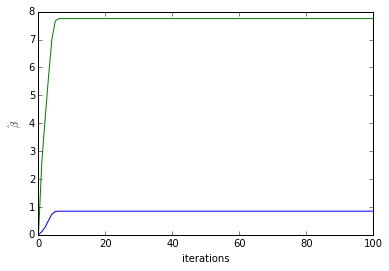

In [127]:
plt.plot(beta_hat.ix[:,0])
plt.plot(beta_hat.ix[:,1])
plt.xlabel("iterations")
plt.ylabel(r"$\hat{\beta}$")